In [58]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

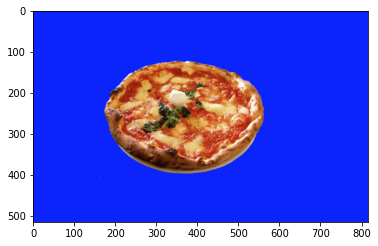

In [59]:
rasm = cv2.imread("rasmlar/pizza.jpg")
rasm = cv2.cvtColor(rasm,cv2.COLOR_BGR2RGB)
plt.imshow(rasm)
plt.show()

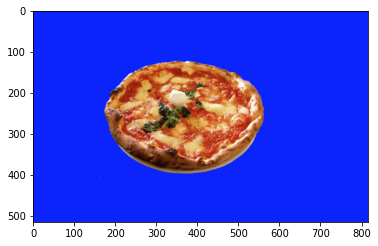

In [60]:
rasm_copy = np.copy(rasm)#rasmdan copuya olish
plt.imshow(rasm_copy)

In [61]:
print(rasm.ndim)
print(rasm.size)
print(rasm.shape)

3
1258272
(514, 816, 3)


In [62]:
%matplotlib qt
plt.imshow(rasm_copy)
plt.show()

In [63]:
range_1 = np.array([0,0,230])
range_2 = np.array([250,250,255])
maska = cv2.inRange(rasm_copy,range_1,range_2)
#maska olishimiz kerak buning uchun 2 ta oraliq olishimisiz kerak

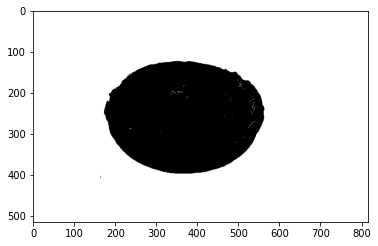

In [64]:
%matplotlib inline
#bu yerda kok fondagilarni oqga aylantrib ortada turgan pizzaning rasmini qora aylantrib beradi
plt.imshow(maska,cmap="gray")
plt.show()

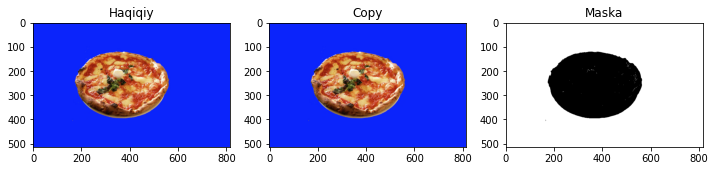

In [65]:
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Haqiqiy")
plt.imshow(rasm)
plt.subplot(132)
plt.title("Copy")
plt.imshow(rasm_copy)
plt.subplot(133)
plt.title("Maska")
plt.imshow(maska,cmap="gray")
plt.show()

In [66]:
maska!=0#oq bolib turgan yerlarni Truega aylantriadi qora bolib turgan yerlarni Falsega

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [67]:
maska#ya'ni 255 bn 0ga

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

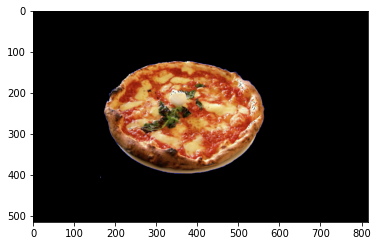

In [68]:
rasm_copy[maska!=0] = [0,0,0]#maska bol bolmagan yerlarni nolga aylantrib chiqmoqda
plt.imshow(rasm_copy)

In [69]:
print(rasm_copy.shape)

(514, 816, 3)


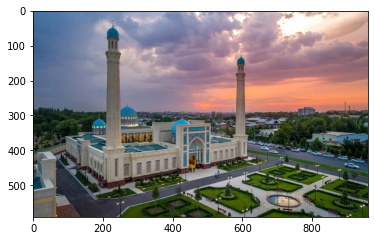

In [70]:
back_rasm = cv2.imread("Rasmlar/tashkent.jpg")
back_rasm = cv2.cvtColor(back_rasm,cv2.COLOR_BGR2RGB)
plt.imshow(back_rasm)

In [71]:
print(back_rasm.shape)

(591, 960, 3)


In [72]:
back_rasm = cv2.resize(back_rasm,(816,514))#bu yerda 2 ta rasmning shapelarini tenglashtrish uchun resiz funksiyasi ishlatyapti

In [73]:
print(back_rasm.shape)

(514, 816, 3)


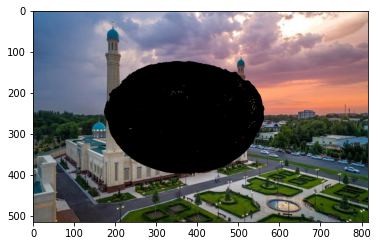

In [74]:
back_rasm[maska==0] = [0,0,0]#hozi maska ==0 bolgan yerlani 0 ga aylantryapti yani pitsa turishi kerak bolgan yerlarni qora qilib chiqmoda
plt.imshow(back_rasm)

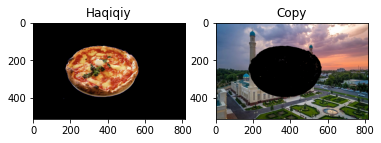

In [75]:
plt.figure(figsize=(6,3))
plt.subplot(121)
plt.title("Haqiqiy")
plt.imshow(rasm_copy)
plt.subplot(122)
plt.title("Copy")
plt.imshow(back_rasm)
plt.show()

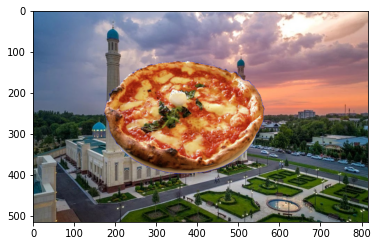

In [77]:
oxirgi = rasm_copy + back_rasm# bu yerda 2 ta rasm qoshilgan pitsa turishi kerak bolgan joylar nolga teng shuning uchun rasmga yaxshi joylashgan
plt.imshow(oxirgi)

In [78]:
back_rasm_orginal = cv2.imread("Rasmlar/tashkent.jpg")
back_rasm_orginal = cv2.cvtColor(back_rasm_orginal,cv2.COLOR_BGR2RGB)
back_rasm_orginal = cv2.resize(back_rasm_orginal,(816,514))

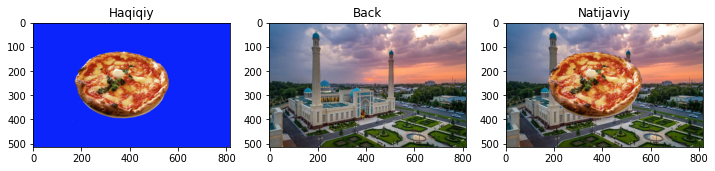

In [79]:
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Haqiqiy")
plt.imshow(rasm)
plt.subplot(132)
plt.title("Back")
plt.imshow(back_rasm_orginal)
plt.subplot(133)
plt.title("Natijaviy")
plt.imshow(oxirgi)
plt.show()

# Videoga pizzani ulash

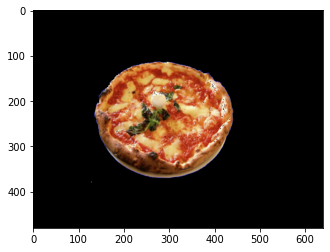

In [80]:
rasm = cv2.imread("rasmlar/pizza.jpg")
rasm = cv2.cvtColor(rasm,cv2.COLOR_BGR2RGB)
rasm = cv2.resize(rasm,(640,480))

maska = cv2.inRange(rasm,range_1,range_2)
rasm[maska!=0] = [0,0,0]
plt.imshow(rasm)

In [81]:
range_1 = np.array([230,0,0])
range_2 = np.array([255,250,250])

In [82]:
video = cv2.VideoCapture("Videolar/video.mp4")#videoni oqib olish
rasm = cv2.imread("rasmlar/pizza.jpg")
rasm = cv2.resize(rasm,(640,480))

maska = cv2.inRange(rasm,range_1,range_2)
rasm[maska!=0] = [0,0,0]

while video.isOpened():#vidoe ochiq bolgancha ishlaydi
    _, kadr = video.read()#videoni kadrma kadr oqib oladi
    
    kadr = cv2.resize(kadr,(640,480))
    kadr[maska==0] = [0,0,0]#bu yerda pitsa turishi kerak bolgan yerlarni nolga aylantryapti
    # write your own code
    kadr = rasm + kadr#2 tasi qo'shildi
    
    cv2.imshow("Klip",kadr)
    if cv2.waitKey(20) & 0xFF == ord("q"):#vidoeni hohlagan payt to'xtatish uchun qo'llaniladi
        break

video.release()
cv2.destroyAllWindows()